In [18]:
from tensorflow.keras.models import load_model

from generators import Singlet

In [20]:
#base_model_history = pickle.load(open(C.base_model+"_history", "rb"))
from create_base_model import model_path
trained_model = load_model(model_path("trained_"+C.base_model))
datagen = Singlet(batch_size=1, directory=C.val_dir, steps_per_epoch=1000)

ValueError: axes don't match array

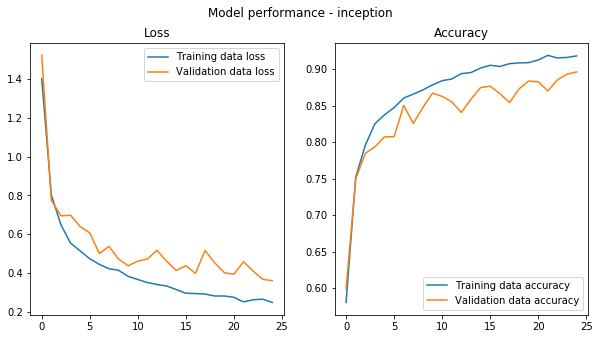

In [16]:
import pandas as pd
df = pd.read_csv("history_trained_"+C.base_model)

def plot_history(history):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history['loss'], label='Training data loss')
    plt.plot(history['val_loss'], label='Validation data loss')
    plt.legend()
    plt.title("Loss")

    plt.subplot(1, 2, 2)
    plt.plot(history['acc'], label='Training data accuracy')
    plt.plot(history['val_acc'], label='Validation data accuracy')
    plt.legend()
    plt.title("Accuracy")
    plt.suptitle("Model performance - {}".format(C.base_model))
    plt.show()
plot_history(df)

In [ ]:
def plot_confusion_matrix(model, val_generator):
    img_vals = []
    stat_vals = []
    y_vals = []
    for i in range(C.base_validation_steps):
        x, y = val_generator[i]
        if len(x) == 2:
            img_vals.append(x[0])
            stat_vals.append(x[1])
        else:
            img_vals.append(x)
        y_vals.append(y)
    if stat_vals:
        X_validation = [np.concatenate(img_vals), np.concatenate(stat_vals)]
    else:
        X_validation = [np.concatenate(img_vals)]
    y_target = np.concatenate(y_vals)
    y_predicted = np.argmax(model.predict(X_validation), axis=1)
    cm = confusion_matrix(y_target, y_predicted)
    for i in range(len(cm)):
        cm[i, i] = 0

    plt.figure(figsize=(15, 15))
    plt.imshow(cm, cmap="Greys")
    plt.xticks(range(max(y_target+1)))
    plt.yticks(range(max(y_target+1)))
    plt.title("Confusion matrix")
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    plt.savefig(os.path.join(outputfolder, 'model_confusion_matrix.png'))
    plt.show()

plot_confusion_matrix(trained_model, datagen)

In [1]:
from create_siamese_model import initialize_bitvector_model
from generators import Singlet
import config as C

import numpy as np

In [2]:
bitvector_model = initialize_bitvector_model()
#bitvector_history = pickle.load(open("siamese_"+C.base_model+"_history", "rb"))

Loading model:models/bitvector_inception.model
Instructions for updating:
Colocations handled automatically by placer.


In [14]:
df

,epoch,loss,val_loss
0,0,0.688040,0.828429
1,1,0.681733,0.716742
2,2,0.691116,0.789189
3,3,0.694244,0.628597
4,4,0.686988,0.646798
5,5,0.701509,0.776843
6,6,0.709909,0.856828
7,7,0.712370,0.735252
8,8,0.707060,0.781593
9,9,0.693716,0.772824


Text(0.5, 1.0, 'Loss')

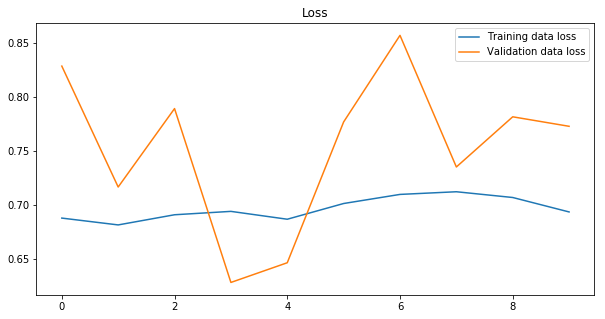

In [15]:
import pandas as pd
df = pd.read_csv("history_siamese_"+C.base_model)
plt.figure(figsize=(10, 5))
plt.plot(df['loss'], label='Training data loss')
plt.plot(df['val_loss'], label='Validation data loss')
plt.legend()
plt.title("Loss")

In [8]:
nrSamples = 4000
datagen = Singlet(batch_size=1, directory=C.val_dir, steps_per_epoch=nrSamples)
imgs = []
labels = []
embeddings = []
for i in range(nrSamples):
    X, y = datagen[i]
    imgs.append(X)
    labels.append(y)
    embeddings.append(bitvector_model.predict_on_batch(X))
    
X = np.stack(embeddings).reshape((nrSamples, C.out_dim))
y = np.asarray(labels).reshape((nrSamples,))

X.shape, y.shape

((4000, 64), (4000,))

In [9]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

In [10]:
X_2d = tsne.fit_transform(X)

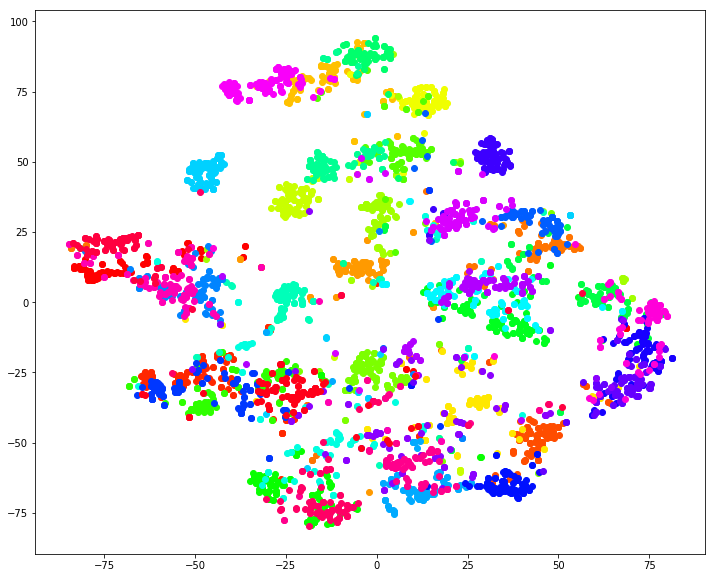

In [12]:
from matplotlib import pyplot as plt

cmap = plt.cm.get_cmap('hsv', 40)
plt.figure(figsize=(12, 10))

for i in range(40):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=[cmap(i)])
plt.show()